# Cat vs Dogs classifier

## Importing required modules

In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(16,9))

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Importing Data 

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

In [3]:
zip_dir_base = os.path.dirname(zip_dir)
print(zip_dir_base)
!tree $zip_dir_base

C:\Users\Arunabh\.keras\datasets
Folder PATH listing for volume Windows
Volume serial number is 00000024 929F:B39D
C:\USERS\ARUNABH\.KERAS\DATASETS
����cats_and_dogs_filtered
    ����train
    �   ����cats
    �   ����dogs
    ����validation
        ����cats
        ����dogs


In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Analysing the data

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images    :', num_cats_tr)
print('total training dog images    :', num_dogs_tr)

print('total validation cat images  :', num_cats_val)
print('total validation dog images  :', num_dogs_val)
print('--')
print('total training images        :', total_train)
print('total validation images      :', total_val)


total training cat images    : 1000
total training dog images    : 1000
total validation cat images  : 500
total validation dog images  : 500
--
total training images        : 2000
total validation images      : 1000


## Data preparation

In [6]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=train_dir,
                                                            shuffle=True,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=validation_dir,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualizing the data

In [22]:
def plotImages(images_arr):

    """Plot images in the form of a 1x5 grid"""

    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.grid(False)
    plt.tight_layout()
    plt.show()

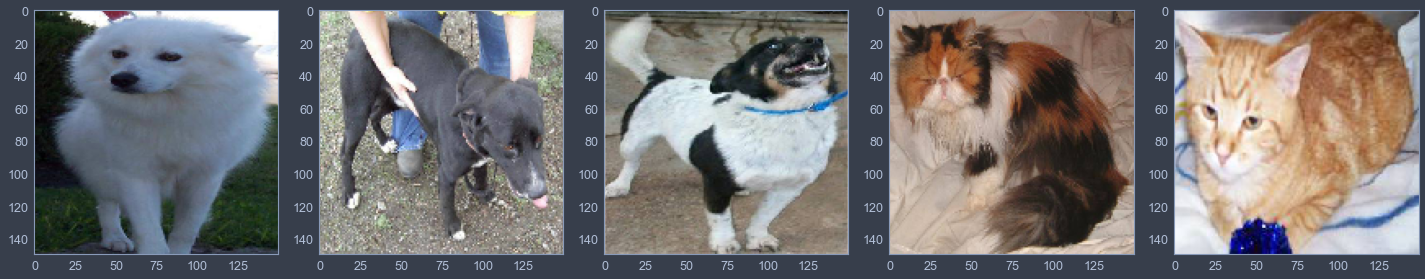

In [23]:
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

## Building the model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
EPOCHS = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

C:\Users\Arunabh\anaconda3\envs\tf-accel\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 61s 2s/step - loss: 0.7212 - accuracy: 0.4985 - val_loss: 0.6918 - val_accuracy: 0.5130
Epoch 2/20
20/20 [==============================] - 15s 744ms/step - loss: 0.6941 - accuracy: 0.5145 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 15s 740ms/step - loss: 0.6919 - accuracy: 0.5190 - val_loss: 0.6847 - val_accuracy: 0.5960
Epoch 4/20
20/20 [==============================] - 15s 733ms/step - loss: 0.6934 - accuracy: 0.5485 - val_loss: 0.6903 - val_accuracy: 0.5380
Epoch 5/20
20/20 [==============================] - 14s 712ms/step - loss: 0.6829 - accuracy: 0.5910 - val_loss: 0.6545 - val_accuracy: 0.6270
Epoch 6/20
20/20 [==============================] - 14s 714ms/step - loss: 0.6801 - accuracy: 0.5615 - val_loss: 0.6864 - val_accuracy: 0.5070
Epoch 7/20
20/20 [==============================] - 14s 717ms/step - loss: 0.6724 - accuracy: 0.5580 - val_loss: 0.6538 - val_accuracy: 0.6220
Ep

# Understanding results

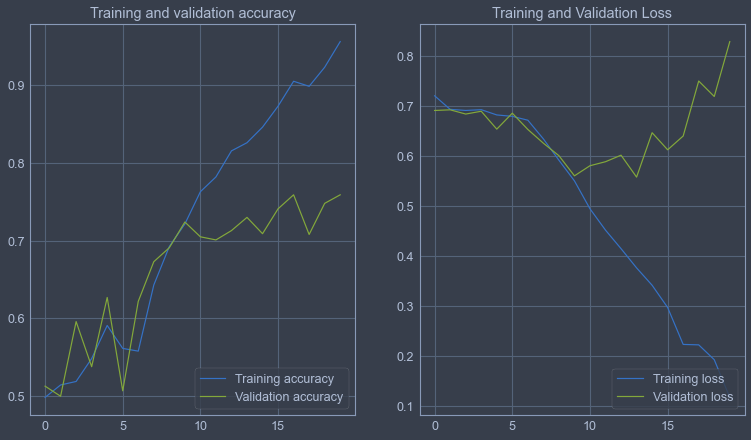

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.savefig('./loss-accuracy.png')